In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
#import mne
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
lag=3 # seconds
sub='NA'
path_dict=ief.get_path_dict()

In [3]:
#ftr_root='/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS'
one_sec_path=os.path.join(path_dict['ftrs_root'],'PWR',sub)
lag_path=os.path.join(path_dict['ftrs_root'],'PWR_'+str(lag)+'SEC',sub)
if not os.path.isdir(lag_path):
    print('Creating directory: %s' % lag_path)
    os.mkdir(lag_path)
else:
    print('Output directory: %s' % lag_path)

Output directory: /Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/PWR_3SEC/NA


In [23]:
# Loop over 1 second window files
for f in os.listdir(one_sec_path):
    print('Loading file %s' % f)
    one_sec_dat=np.load(os.path.join(one_sec_path,f))
    time_wind_sec=one_sec_dat['time_wind_sec']
    peri_ictal=one_sec_dat['peri_ictal']
    
    # Preallocate mem
    n_dim, n_wind=one_sec_dat['ftrs'].shape
    causal_avg_pwr=np.zeros((n_dim,n_wind))

    # Compute sampling rate
    dlt=time_wind_sec[1]-time_wind_sec[0]
    wind_hz=1/dlt
    n_meta_wind=int(lag*wind_hz)
    
    # Apply causal moving average
    for wind in range(n_wind):
        use_ids=np.arange(wind-n_meta_wind,wind+1,dtype=int) # avg between lag back and current time point
        use_ids=use_ids[use_ids>=0] # remove any window before beginning of file
        #use_ids=use_ids.astype(int)
        causal_avg_pwr[:,wind]=np.mean(one_sec_dat['ftrs'][:,use_ids],axis=1)

    # Save file
    f_stem=f.split('.')[0]
    out_fname=os.path.join(lag_path,f_stem+'_'+str(lag)+'sec.npz')
#     print('Saving file %s' % out_fname)
#     np.savez(out_fname,
#              time_wind_sec=time_wind_sec,
#              causal_avg_pwr=causal_avg_pwr,
#              peri_ictal=peri_ictal)

Loading file NA_d1_sz2_bppwr.npz
Loading file NA_d1_sz3_bppwr.npz
Loading file NA_d1_sz4_bppwr.npz
Loading file NA_d1_sz5_bppwr.npz
Loading file NA_d2_sz1_bppwr.npz


In [31]:
f_tail = f.split('_')[-1]
f_stem = f.split('_'+f_tail)[0]
print(f_stem)

NA_d2_sz1


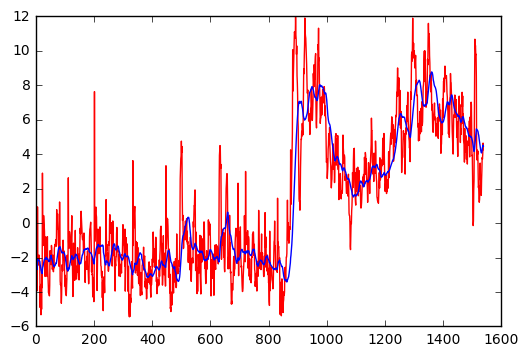

In [24]:
band_id=5
_=plt.plot(one_sec_dat['ftrs'][band_id,:],'r-')
_=plt.plot(causal_avg_pwr[band_id,:],'b-')

In [12]:
one_sec_dat.keys()

['time_wind_sec', 'db_pwr', 'peri_ictal']

In [32]:
sis=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/PWR/RB/RB_d7_sz1_bppwr.npz')

In [33]:
sis['ftrs'].shape

(6, 2480)

In [45]:
sis=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/temp.npz')

In [49]:
sis.keys()

['ftrs', 'szr_class', 'sub_id']

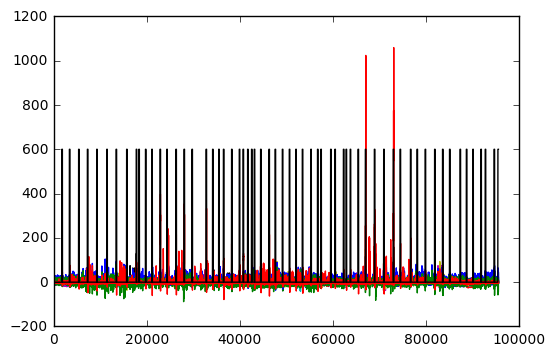

In [53]:
_=plt.plot(sis['ftrs'])
_=plt.plot(sis['szr_class']*600,'k-')

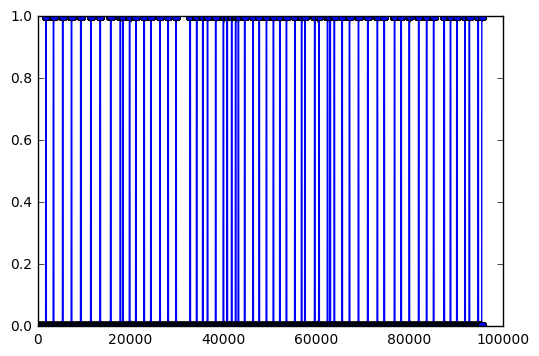

In [47]:
_=plt.plot(sis['szr_class'],'-o')

(95615,)

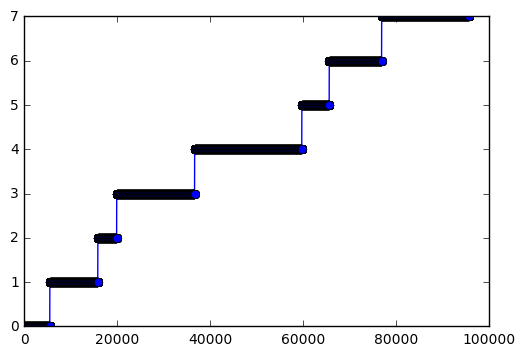

In [48]:
_=plt.plot(sis['sub_id'],'-o')
sis['sub_id'].shape